# 激活函数绘制

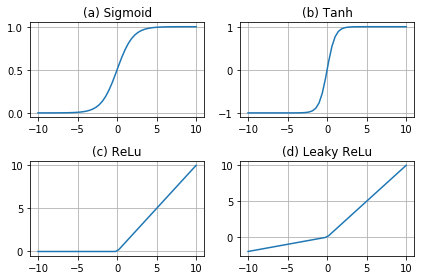

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
# plot sigmoid
ax = fig.add_subplot(221)
ax.plot(x,y_sigmoid)
ax.grid()
ax.set_title('(a) Sigmoid')

# plot tanh
ax = fig.add_subplot(222)
ax.plot(x,y_tanh)
ax.grid()
ax.set_title('(b) Tanh')

# plot relu
ax = fig.add_subplot(223)
y_relu = np.array([0*item  if item<0 else item for item in x ]) 
ax.plot(x,y_relu)
ax.grid()
ax.set_title('(c) ReLu')

#plot leaky relu
ax = fig.add_subplot(224)
y_relu = np.array([0.2*item  if item<0 else item for item in x ]) 
ax.plot(x,y_relu)
ax.grid()
ax.set_title('(d) Leaky ReLu')
plt.tight_layout()#自动控制间隔


# bp神经网络的python实现

In [1]:
import os
os.chdir('C:\\Users\\CDA\\data')
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
def load_data():
    data=pd.read_table("bpdata.txt",sep='	',names=['x1','x2','y'])
    feature=data[['x1','x2']].values
    label_tmp=data['y'].values
    n_class = len(set(label_tmp))  # 得到类别的个数，2
   
    #标签转成独热码
    m = len(label_tmp)#400
    label = np.mat(np.zeros((m, n_class)))
    for i in range(m):
        label[i, label_tmp[i]] = 1
    return np.mat(feature), label,n_class 

def sig(x):
    '''Sigmoid函数
    input:  x(mat/float):自变量，可以是矩阵或者是任意实数
    output: Sigmoid值(mat/float):Sigmoid函数的值
    '''
    return 1.0 / (1 + np.exp(-x))

def partial_sig(x):
    '''Sigmoid导函数的值
    input:  x(mat/float):自变量，可以是矩阵或者是任意实数
    output: out(mat/float):Sigmoid导函数的值
    '''
    m, n = np.shape(x)
    out = np.mat(np.zeros((m, n)))
    for i in range(m):
        for j in range(n):
            out[i, j] = sig(x[i, j]) * (1 - sig(x[i, j]))
    return out

def hidden_in(feature, w0, b0):
    '''计算隐含层的输入
    input:  feature(mat):特征
            w0(mat):输入层到隐含层之间的权重
            b0(mat):输入层到隐含层之间的偏置
    output: hidden_in(mat):隐含层的输入
    '''
    m = np.shape(feature)[0]#m=400
    hidden_in = feature * w0
    for i in range(m):
        hidden_in[i, ] += b0#所有的输入样本点都加上偏置
    return hidden_in

def hidden_out(hidden_in):
    '''隐含层的输出
    input:  hidden_in(mat):隐含层的输入
    output: hidden_output(mat):隐含层的输出
    '''
    hidden_output = sig(hidden_in)
    return hidden_output;

def predict_in(hidden_out, w1, b1):
    '''计算输出层的输入
    input:  hidden_out(mat):隐含层的输出
            w1(mat):隐含层到输出层之间的权重
            b1(mat):隐含层到输出层之间的偏置
    output: predict_in(mat):输出层的输入
    '''
    m = np.shape(hidden_out)[0]
    predict_in = hidden_out * w1
    for i in range(m):
        predict_in[i, ] += b1
    return predict_in
    
def predict_out(predict_in):
    '''输出层的输出
    input:  predict_in(mat):输出层的输入
    output: result(mat):输出层的输出
    '''
    result = sig(predict_in)
    return result

def bp_train(feature, label, n_hidden, maxCycle, alpha, n_output):
    '''计算隐含层的输入
    input:  feature(mat):特征
            label(mat):标签
            n_hidden(int):隐含层的节点个数
            maxCycle(int):最大的迭代次数
            alpha(float):学习率
            n_output(int):输出层的节点个数
    output: w0(mat):输入层到隐含层之间的权重
            b0(mat):输入层到隐含层之间的偏置
            w1(mat):隐含层到输出层之间的权重
            b1(mat):隐含层到输出层之间的偏置
    '''
    m, n = np.shape(feature)#400,2
    # 1、初始化
    w0 = np.mat(np.random.rand(n, n_hidden))#2x20,两个输入，20个输出
    w0 = w0 * (8.0 * sqrt(6)/sqrt(n + n_hidden))-np.mat(np.ones((n, n_hidden)))*(4.0 * sqrt(6)/sqrt(n + n_hidden))
    b0 = np.mat(np.random.rand(1, n_hidden))#1x20
    b0 = b0 * (8.0 * sqrt(6)/sqrt(n + n_hidden))-np.mat(np.ones((1, n_hidden)))*(4.0 * sqrt(6)/sqrt(n + n_hidden))
    w1 = np.mat(np.random.rand(n_hidden, n_output))#20x2
    w1 = w1 * (8.0 * sqrt(6)/sqrt(n_hidden + n_output))-np.mat(np.ones((n_hidden, n_output)))*(4.0 * sqrt(6)/sqrt(n_hidden + n_output))
    b1 = np.mat(np.random.rand(1, n_output))#1x2
    b1 = b1 * (8.0 * sqrt(6)/sqrt(n_hidden + n_output))-np.mat(np.ones((1, n_output)))*(4.0 * sqrt(6)/sqrt(n_hidden + n_output))
    
    # 2、训练
    i = 0
    while i <= maxCycle:
        # 2.1、信号正向传播
        # 2.1.1、计算隐含层的输入
        hidden_input = hidden_in(feature, w0, b0)  # mXn_hidden
        # 2.1.2、计算隐含层的输出
        hidden_output = hidden_out(hidden_input)
        # 2.1.3、计算输出层的输入
        output_in = predict_in(hidden_output, w1, b1)  # mXn_output
        # 2.1.4、计算输出层的输出
        output_out = predict_out(output_in)
        
        # 2.2、误差的反向传播
        # 2.2.1、隐含层到输出层之间的残差
        delta_output = -np.multiply((label - output_out), partial_sig(output_in))
        # 2.2.2、输入层到隐含层之间的残差
        delta_hidden = np.multiply((delta_output * w1.T), partial_sig(hidden_input))
        
        # 2.3、 修正权重和偏置       
        w1 = w1 - alpha * (hidden_output.T * delta_output)
        b1 = b1 - alpha * np.sum(delta_output, axis=0) * (1.0 / m)
        w0 = w0 - alpha * (feature.T * delta_hidden)
        b0 = b0 - alpha * np.sum(delta_hidden, axis=0) * (1.0 / m)
        if i % 100 == 0:
            print("\t-------- iter: ", i, " ,cost: ",  (1.0/2) * get_cost(get_predict(feature, w0, w1, b0, b1) - label))                
        i += 1           
    return w0, w1, b0, b1

def get_cost(cost):
    '''计算当前损失函数的值
    input:  cost(mat):预测值与标签之间的差
    output: cost_sum / m (double):损失函数的值
    '''
    m,n = np.shape(cost)
    
    cost_sum = 0.0
    for i in range(m):
        for j in range(n):
            cost_sum += cost[i,j] * cost[i,j]
    return cost_sum / m

def get_predict(feature, w0, w1, b0, b1):
    '''计算最终的预测
    input:  feature(mat):特征
            w0(mat):输入层到隐含层之间的权重
            b0(mat):输入层到隐含层之间的偏置
            w1(mat):隐含层到输出层之间的权重
            b1(mat):隐含层到输出层之间的偏置
    output: 预测值
    '''
    return predict_out(predict_in(hidden_out(hidden_in(feature, w0, b0)), w1, b1))    

    
def err_rate(label, pre):
    '''计算训练样本上的错误率
    input:  label(mat):训练样本的标签
            pre(mat):训练样本的预测值
    output: rate[0,0](float):错误率
    '''
    m = np.shape(label)[0]
    err = 0.0
    for i in range(m):
        if label[i, 0] != pre[i, 0]:
            err += 1
    rate = err / m
    return rate

if __name__ == "__main__":
    #导入数据
    print("--------- 1.load data ------------")
    feature, label, n_class = load_data()#神经元有两个输入，两个输出
    plt.figure(figsize=(8,4),dpi=100)
    feature1=feature[:,0].getA()
    feature2=feature[:,1].getA()
    plt.scatter(feature1[0:200],feature2[0:200],color='b')
    plt.scatter(feature1[200:],feature2[200:],color='r')
    plt.title("original_data")
    
    #训练网络模型
    print("--------- 2.training ------------")
    w0, w1, b0, b1 = bp_train(feature, label, 20, 1000, 0.1, n_class)

    #得到最终的预测结果
    print("--------- 3.get prediction ------------")
    result = get_predict(feature, w0, w1, b0, b1)
    print("训练准确性为：", (1 - err_rate(np.argmax(label, axis=1), np.argmax(result, axis=1))))


--------- 1.load data ------------
--------- 2.training ------------
	-------- iter:  0  ,cost:  0.1113069024248611
	-------- iter:  100  ,cost:  0.027346149730418087
	-------- iter:  200  ,cost:  0.019339030087782393
	-------- iter:  300  ,cost:  0.016163340209465124
	-------- iter:  400  ,cost:  0.01430811597893449
	-------- iter:  500  ,cost:  0.012798742095258418
	-------- iter:  600  ,cost:  0.01019797009670846
	-------- iter:  700  ,cost:  0.009421969544930762
	-------- iter:  800  ,cost:  0.008983876097233367
	-------- iter:  900  ,cost:  0.008054993381453063
	-------- iter:  1000  ,cost:  0.00839615917935992
--------- 3.get prediction ------------
训练准确性为： 0.99


# sklearn中的MLP

In [19]:
#分类
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]#输出一个
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X, y)  
print(clf.predict_proba([[2., 2.], [-1., -2.]]))
print([coef.shape for coef in clf.coefs_])
print(clf.predict([[2., 2.], [-1., -2.]]))

[1 0]
[[1.96718015e-004 9.99803282e-001]
 [1.00000000e+000 4.67017947e-144]]
[(2, 5), (5, 2), (2, 1)]


In [16]:
#回归
from sklearn.neural_network import MLPRegressor
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

array([ 0.99992939, -1.74426841])

In [17]:
clf.coefs_

[array([[-0.15363893,  0.34727085, -0.92556938, -0.58865324, -0.65405348],
        [-0.75481049, -0.64158244, -0.28595394, -0.41380114,  0.0718716 ]]),
 array([[ 0.31563122, -0.15311531],
        [ 0.17586972, -0.66584599],
        [-0.5589839 ,  0.55684731],
        [ 0.98388591, -0.34545676],
        [ 0.35609731,  0.69690797]]),
 array([[-1.15931301],
        [-0.93382131]])]

# 葡萄酒分类

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import os
os.chdir('C:\\Users\\CDA\\data')
data = np.genfromtxt('wine_data.csv', delimiter=',')

In [5]:
x_data=data[:,1:]#数据特征
x_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
y_data=data[:,0]
y_data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)#分为训练和测试

In [6]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

In [27]:
len(x_train)

133

In [28]:
len(x_test)

45

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)#标准化处理
x_test = scaler.transform(x_test)

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
predictions = mlp.predict(x_test)

In [14]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        1.0       1.00      0.92      0.96        12
        2.0       0.89      1.00      0.94        17
        3.0       1.00      0.94      0.97        16

avg / total       0.96      0.96      0.96        45



In [15]:
print(confusion_matrix(y_test,predictions))

[[11  1  0]
 [ 0 17  0]
 [ 0  1 15]]


# tensorflow

In [6]:
# 建立常量和变量
import tensorflow as tf		# 导入tensorflow模块
ts_c = tf.constant(2,name='ts_c')
ts_x = tf.Variable(ts_c+5,name='ts_x')
ts_x

Instructions for updating:
Colocations handled automatically by placer.


<tf.Variable 'ts_x:0' shape=() dtype=int32_ref>

In [7]:
ts_c

<tf.Tensor 'ts_c:0' shape=() dtype=int32>

In [8]:
sess=tf.Session()#打开session开始执行计算图
init = tf.global_variables_initializer()
sess.run(init)#初始化所有TensorFlow global变量
sess.run(ts_c)

2

In [19]:
print(ts_c.shape)

()


In [4]:
sess.run(ts_x)

7

In [5]:
sess.close()#不使用session时候，将其关闭

In [13]:
#占位符号
width = tf.placeholder("int32")
height = tf.placeholder("int32")
area=tf.multiply(width,height)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('area=',sess.run(area,feed_dict={width: 6, height: 8}))

area= 48


In [6]:
#创建一维张量
ts_X = tf.Variable([0.4,0.2,0.4])#建立一维张量使用tf.Variable传入即可
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X=sess.run(ts_X)
    print(X)
    print(X.shape)

[0.4 0.2 0.4]
(3,)


In [50]:
ts_X = tf.Variable([[0.4,0.2,0.4]])#建立二维张量
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X=sess.run(ts_X)
    print(X)
    print(X.shape)

[[0.4 0.2 0.4]]
(1, 3)


In [51]:
#矩阵乘法
X = tf.Variable([[1.,1.,1.]])
W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                        
XW =tf.matmul(X,W)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(XW))


[[-1.3  0.4]]


In [20]:
#矩阵乘加
X = tf.Variable([[1.,1.,1.]])
W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
b = tf.Variable([[0.1,0.2]])
XWb =tf.matmul(X,W)+b
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)  
    print(sess.run(XWb))

[[-1.1999999  0.6      ]]


In [21]:
#模拟神经网络
import tensorflow as tf
import numpy as np
X = tf.Variable([[0.4,0.2,0.4]])#输入x，接收外界传送信息，三个神经元，x1，x2，x3
W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])#权重                       
b = tf.Variable([[0.1,0.2]])#偏置  
XWb =tf.matmul(X,W)+b
y=tf.nn.relu(XWb)#激活函数
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)       
    print(sess.run(y))

[[0.   0.28]]


In [22]:
#sigmoid
import tensorflow as tf
import numpy as np
X = tf.Variable([[0.4,0.2,0.4]])#输入x，接收外界传送信息，三个神经元，x1，x2，x3
W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])#权重                       
b = tf.Variable([[0.1,0.2]])#偏置  
y=tf.nn.sigmoid(tf.matmul(X,W)+b)#激活函数
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)    
    print(sess.run(y))

[[0.41095957 0.5695462 ]]


In [8]:
#随机数生成
import tensorflow as tf
import numpy as np
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(y))    

[[0.        1.1832597]]


In [9]:
#通过placehoder输入参数，神经网络进行运算
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])#传入的x项数不限制，所以为none，第二维为每一项的个数，有三项，所以为3
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4],[1,1,2],[2,2,3],[3,4,5]])#x传入这些值
    print(sess.run(y,feed_dict={X:X_array}))#以feed_dict传入x

[[1.4986275 1.1593813]
 [0.        1.2953691]
 [0.        1.5093622]
 [0.        1.6148528]]


In [2]:
#建立层
# output_dim输出的神经元数量
# input_dim输入的神经元数量
# inputs输入的二维数组，x
# activation传入激活函数
import os
os.chdir('C:\\Users\\chen\\File')
import tensorflow as tf
import numpy as np
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))#随机初始化w，权重，正态分布
    b = tf.Variable(tf.random_normal([1, output_dim]))   #偏置，正态分布
    XWb = tf.matmul(inputs,W) + b    #建立矩阵表达式
    if activation is None:    #设置激活函数
        outputs = XWb    #不使用激活函数
    else:
        outputs = activation(XWb)    #使用激活函数
    return outputs

# 建立有一个隐藏层的神经网络

In [3]:
X = tf.placeholder("float", [None,4])#第一维，项数不固定，设置为none，第二维，设置为4，输入神经元是4
h=layer(output_dim=8,input_dim=4,inputs=X, activation=tf.nn.relu)#隐藏层
y=layer(output_dim=2,input_dim=8,inputs=h)#输出不用激活函数

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4,0.5]])    #输入是1x4
    layer_y=sess.run(y,feed_dict={X:X_array})
    print(layer_y)#输出层
    writer = tf.summary.FileWriter("./log", sess.graph)
    writer.close()

[[ 2.525412  -6.6734815]]


In [5]:
writer = tf.summary.FileWriter("./log", sess.graph)
writer.close()

#promt tensorboard --logdir=C:\Users\chen\File\log

# 有两个隐藏层的神经网络

In [29]:
#有两个隐藏层的神经网络
X = tf.placeholder("float", [None,4])#第一维，项数不固定，设置为none，第二维，设置为4，输入神经元是4
h1=layer(output_dim=3,input_dim=4,inputs=X, activation=tf.nn.relu)#隐藏层
h2=layer(output_dim=3,input_dim=3,inputs=h1, activation=tf.nn.relu)#隐藏层
y=layer(output_dim=2,input_dim=3,inputs=h2)#输入是h2
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])    #输入是1x4
    print(sess.run(y,feed_dict={X:X_array}))

[[1.0594505 0.4402953]]


# 神经网络实现手写数字识别

# 查看数据

In [1]:
#神经网络实现手写数字识别
import tensorflow as tf
import os
os.chdir('C:\\Users\\CDA\\data')
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)#读取数据
print('train',mnist.train.num_examples,
      ',validation',mnist.validation.num_examples,
      ',test',mnist.test.num_examples)   #查看数据，train 55000 ,validation 5000 ,test 10000

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
train 55000 ,validation 5000 ,test 10000


In [36]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)

train images     : (55000, 784) labels: (55000, 10)


In [18]:
len(mnist.train.images[0])

784

In [19]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

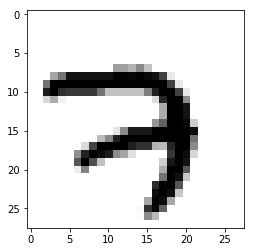

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')#rainbow
    plt.show()
plot_image(mnist.train.images[0])     #数字7

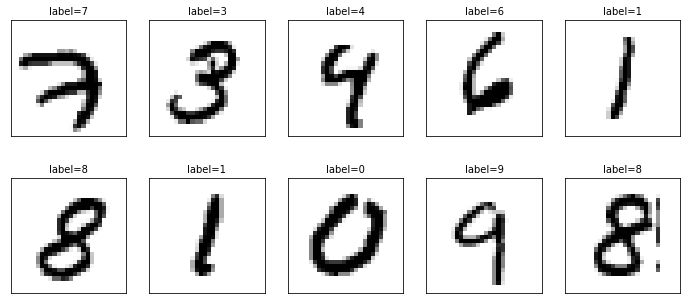

In [23]:
#查看多项训练数据images和labels
import numpy as np
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels, prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')#转换images字段
        title= "label=" +str(np.argmax(labels[idx]))#转换label字段
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

In [16]:
for i in range(10):
    print(mnist.train.labels[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


validation images: (5000, 784) labels: (5000, 10)


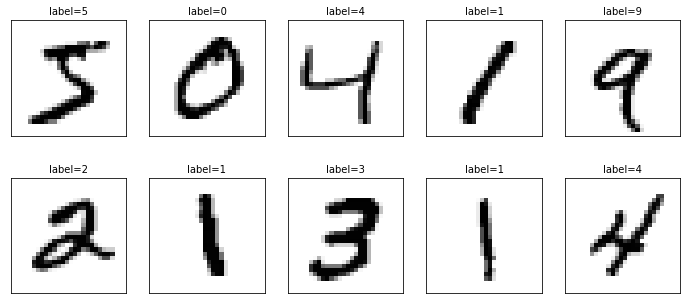

test images: (10000, 784) labels: (10000, 10)


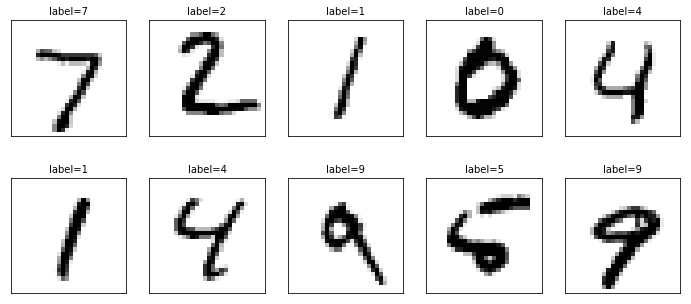

In [24]:
#查看验证数据
print('validation images:', mnist.validation.images.shape,'labels:', mnist.validation.labels.shape)
plot_images_labels_prediction(mnist.validation.images,mnist.validation.labels,[],0)
#查看测试数据
print('test images:', mnist.test.images.shape,'labels:', mnist.test.labels.shape)
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,[],0)


100 100


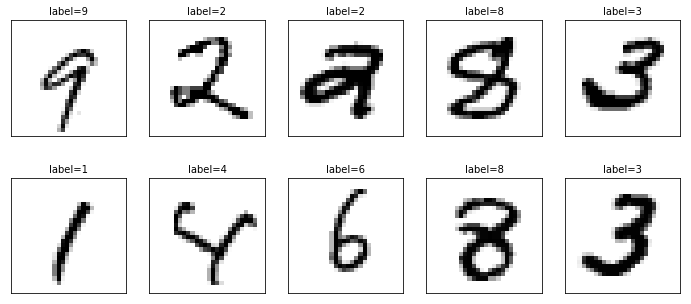

In [18]:
#批次读取数据
#利用神经网络训练时候，并不是读取所有数据进行训练，而是批次读取（比如100项）
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=100)
print(len(batch_images_xs),len(batch_labels_ys))
plot_images_labels_prediction(batch_images_xs,batch_labels_ys,[],0)

# 搭建神经网络，完整流程

In [42]:
#神经网络实现手写数字识别
import tensorflow as tf
import os
os.chdir('C:\\Users\\chen\\File')
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)#读取数据
print('train',mnist.train.num_examples,
      ',validation',mnist.validation.num_examples,
      ',test',mnist.test.num_examples)   #查看数据，train 55000 ,validation 5000 ,test 10000

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train 55000 ,validation 5000 ,test 10000


In [43]:
#建立layer函数
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [44]:
#输入层x，784个神经元  建立输入层
x = tf.placeholder("float", [None, 784])
# 建立隐藏层h1 256个神经元
h1=layer(output_dim=256,input_dim=784,inputs=x ,activation=tf.nn.relu)  
#输出层  10个神经元
y_predict=layer(output_dim=10,input_dim=256,inputs=h1,activation=None)

In [45]:
#建立训练数据label真实值 placeholder
y_label = tf.placeholder("float", [None, 10])

In [46]:
#定义训练方式
#https://blog.csdn.net/weixin_37567451/article/details/80895309
#常用损失函数，https://blog.csdn.net/limiyudianzi/article/details/80693695
#定义loss function#在深度学习中使用cross_entropy交叉熵训练的效果比较好
#https://blog.csdn.net/u014313009/article/details/51043064
#https://m.jb51.net/article/138934.htm
#预测值和真实值的交叉熵，取平均值
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [47]:
#选择optimizer，训练的方法，学习率为0.001，最小化损失函数
#常用优化器https://blog.csdn.net/perom/article/details/80540470
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)


In [48]:
correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#用cast转换为float类型

In [49]:
#tf.argmax(vector, 1)：返回的是vector中的最大值的索引号，
import tensorflow as tf
import numpy as np
 
A = [[1,3,4,5,6]]
B = [[1,3,4], [2,4,1]]
 
with tf.Session() as sess:
    print(sess.run(tf.argmax(A, 1)))
    print(sess.run(tf.argmax(B, 1)))


[4]
[2 1]


In [50]:
#cast，将x的数据格式转化成dtype
a = tf.Variable([1,0,0,1,1])
b = tf.cast(a,dtype=tf.bool)
sess = tf.Session()
sess.run(tf.initialize_all_variables())
print(sess.run(b))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[ True False False  True  True]


In [51]:
correct_prediction

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [52]:
from time import time#计算时间
time()

1562225560.7498405

In [53]:
time()

1562225561.3417149

In [54]:
#执行计算图
trainEpochs = 15#15个训练周期
batchSize = 100#每一批次项数为100
totalBatchs = int(mnist.train.num_examples/batchSize)#每个周期所需执行批次,550
epoch_list=[];loss_list=[];accuracy_list=[]#初始化训练周期，误差，准确率
from time import time#计算时间
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())#初始化TensorFlow global变量

for epoch in range(trainEpochs):#15个周期
    for i in range(totalBatchs):#执行550批次训练，使用优化器进行训练，交叉熵误差最小化
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})#对模型训练
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})#

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.114124775  Accuracy= 0.8408
Train Epoch: 02 Loss= 3.968857050  Accuracy= 0.884
Train Epoch: 03 Loss= 2.998065472  Accuracy= 0.9066
Train Epoch: 04 Loss= 2.488592625  Accuracy= 0.9172
Train Epoch: 05 Loss= 2.150012016  Accuracy= 0.9214
Train Epoch: 06 Loss= 1.979717016  Accuracy= 0.9248
Train Epoch: 07 Loss= 1.726409197  Accuracy= 0.9314
Train Epoch: 08 Loss= 1.644844174  Accuracy= 0.9336
Train Epoch: 09 Loss= 1.511969328  Accuracy= 0.9364
Train Epoch: 10 Loss= 1.412911415  Accuracy= 0.9384
Train Epoch: 11 Loss= 1.373728275  Accuracy= 0.9418
Train Epoch: 12 Loss= 1.304039121  Accuracy= 0.942
Train Epoch: 13 Loss= 1.320186138  Accuracy= 0.94
Train Epoch: 14 Loss= 1.343106866  Accuracy= 0.9386
Train Epoch: 15 Loss= 1.215845346  Accuracy= 0.946
Train Finished takes: 23.72783398628235


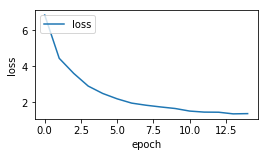

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')


In [44]:
#模型准确率
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9452


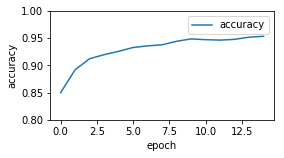

In [19]:
#准确率与训练次数关系
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [45]:
#预测
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

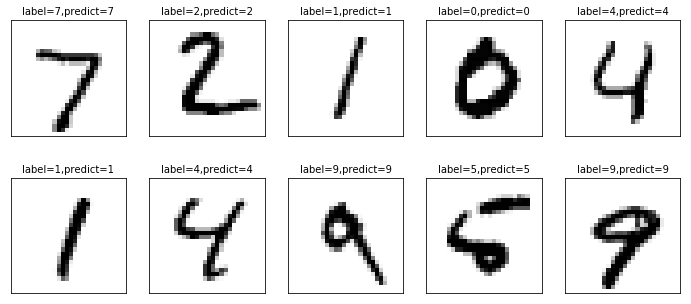

In [25]:
#预测结果与真实值比较
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
plt.show()
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)


# 增加隐藏层神经元个数

In [1]:
#导入数据
import os
os.chdir('C:\\Users\\chen\\File')
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('train images:', mnist.train.images.shape,'labels:', mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,' labels:' , mnist.validation.labels.shape)
print('test images :', mnist.test.images.shape,'labels:', mnist.test.labels.shape)

#建立layer函数
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

#输入层x，784个神经元  建立输入层
x = tf.placeholder("float", [None, 784])
# 建立隐藏层h1 1024个神经元
h1=layer(output_dim=1024,input_dim=784,inputs=x ,activation=tf.nn.relu)  
#输出层  10个神经元
y_predict=layer(output_dim=10,input_dim=1024,inputs=h1,activation=None)

#定义训练方式
##建立训练数据label真实值 placeholder
y_label = tf.placeholder("float", [None, 10])

#定义loss function#在深度学习中使用cross_entropy交叉熵训练的效果比较好
#https://blog.csdn.net/u014313009/article/details/51043064
#预测值和真实值的交叉熵，取平均值
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

#选择optimizer，训练的方法，学习率为0.001，最小化损失函数
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#用cast转换为float类型

trainEpochs = 15#15个训练周期
batchSize = 100#每一批次项数为100
totalBatchs = int(mnist.train.num_examples/batchSize)#每个周期所需执行批次,550
epoch_list=[];loss_list=[];accuracy_list=[]#初始化训练周期，误差，准确率
from time import time#计算时间
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())#初始化TensorFlow global变量

for epoch in range(trainEpochs):#15个周期
    for i in range(totalBatchs):#执行550批次训练，使用优化器进行训练，误差最小化
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})#

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)     
writer = tf.summary.FileWriter("./log", sess.graph)
writer.close()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
train images: (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images : (10000, 784) labels: (10000, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.soft

# 增加隐藏层

In [29]:
#导入数据
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('train images:', mnist.train.images.shape,'labels:', mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,' labels:' , mnist.validation.labels.shape)
print('test images :', mnist.test.images.shape,'labels:', mnist.test.labels.shape)

#建立layer函数
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

#输入层x，784个神经元  建立输入层
x = tf.placeholder("float", [None, 784])
# 建立隐藏层h1 1024个神经元
h1=layer(output_dim=1024,input_dim=784,inputs=x ,activation=tf.nn.relu)  

# 建立隐藏层h2 1024个神经元
h2=layer(output_dim=1024,input_dim=1024,inputs=h1 ,activation=tf.nn.relu)  

#输出层  10个神经元
y_predict=layer(output_dim=10,input_dim=1024,inputs=h2,activation=None)

#定义训练方式
##建立训练数据label真实值 placeholder
y_label = tf.placeholder("float", [None, 10])

#定义loss function#在深度学习中使用cross_entropy交叉熵训练的效果比较好
#https://blog.csdn.net/u014313009/article/details/51043064
#预测值和真实值的交叉熵，取平均值
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

#选择optimizer，训练的方法，学习率为0.001，最小化损失函数
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y_label, 1),tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#用cast转换为float类型

trainEpochs = 15#15个训练周期
batchSize = 100#每一批次项数为100
totalBatchs = int(mnist.train.num_examples/batchSize)#每个周期所需执行批次,550
epoch_list=[];loss_list=[];accuracy_list=[]#初始化训练周期，误差，准确率
from time import time#计算时间
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())#初始化TensorFlow global变量

for epoch in range(trainEpochs):#15个周期
    for i in range(totalBatchs):#执行550批次训练
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})#

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)     

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train images: (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images : (10000, 784) labels: (10000, 10)
Train Epoch: 01 Loss= 136.222396851  Accuracy= 0.9144
Train Epoch: 02 Loss= 93.555152893  Accuracy= 0.9304
Train Epoch: 03 Loss= 77.741729736  Accuracy= 0.9422
Train Epoch: 04 Loss= 67.205101013  Accuracy= 0.9482
Train Epoch: 05 Loss= 63.870700836  Accuracy= 0.9516
Train Epoch: 06 Loss= 61.039913177  Accuracy= 0.9506
Train Epoch: 07 Loss= 57.772518158  Accuracy= 0.9556
Train Epoch: 08 Loss= 57.500526428  Accuracy= 0.9592
Train Epoch: 09 Loss= 53.418025970  Accuracy= 0.9618
Train Epoch: 10 Loss= 60.966201782  Accuracy= 0.9588
Train Epoch: 11 Loss= 55.260856628  Accuracy= 0.9618
Train Epoch: 12 Loss= 48.996799469  Accuracy= 0.9658
Train Epoch: 13 Loss= 52